Using backend: tensorflow.compat.v1

2021-12-14 16:52:06.755524: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Instructions for updating:
non-resource variables are not supported in the long term




heat_1d_boundary_sin_exact: Average time with 25 tries: 0.0002 seconds
finite_difference_crank_nicolson: Average time with 25 tries: 0.0084 seconds


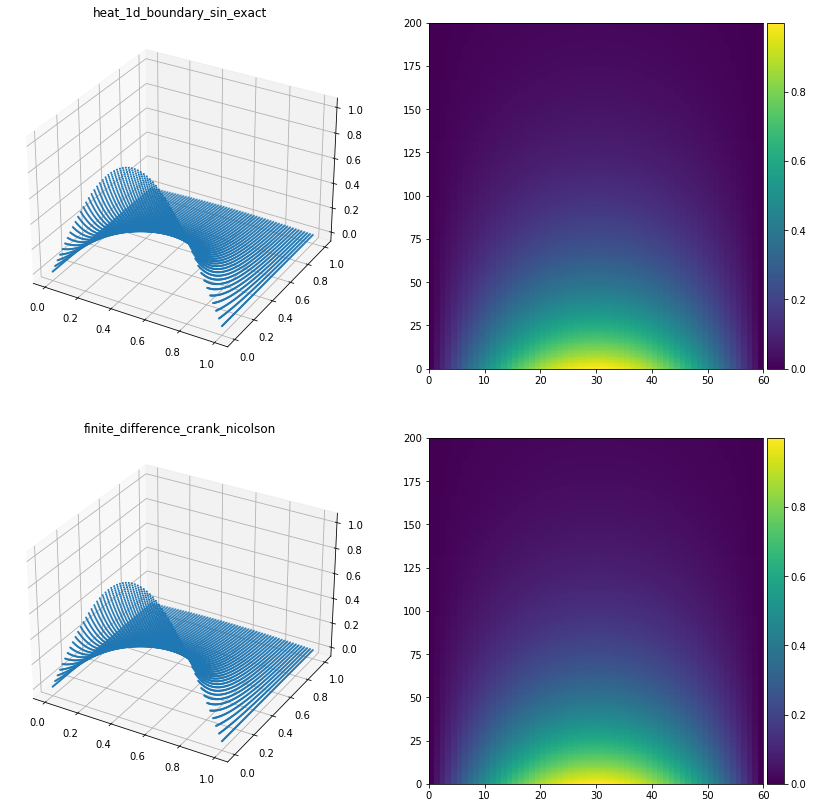

In [1]:
from heat import *
from heat_pinn import *

TIMER_REPEAT_TIMES = 25

# Generate constants throughout this app!!
const_params = HeatConstParam()
solve_analytical_and_numerical(const_params, TIMER_REPEAT_TIMES)
plotter = Plotter(2, 2)
plot_analytical_and_numerical(plotter, const_params)


# Test 1: Optimal Parameters

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


train_bc_points shape (240, 2)
train_points shape (2780, 2)
train_next_batch shape (3020, 2)


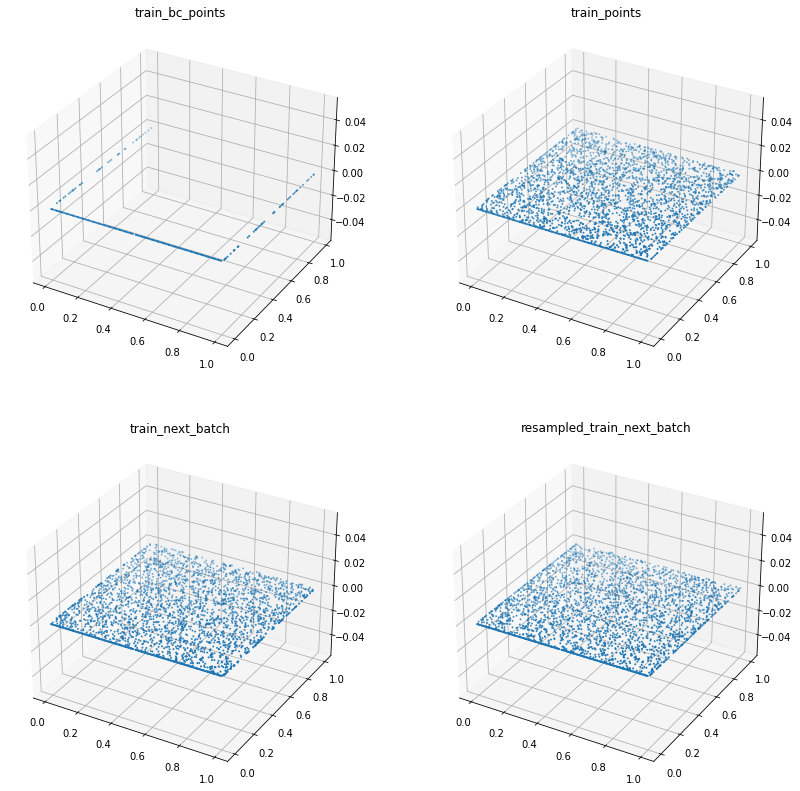

In [2]:
# Create model and plot training data
pinn_params = PinnParam()
geomtime_data, model = create_model(const_params, pinn_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.029230 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 16:52:13.944866: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-14 16:52:13.945418: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-12-14 16:52:13.967293: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: un

'compile' took 0.215137 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.81e-02, 1.70e-02, 3.91e-01]    [1.75e-02, 1.70e-02, 3.91e-01]    []  


2021-12-14 16:52:14.134508: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-12-14 16:52:14.159184: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3593345000 Hz


1000      [6.04e-04, 4.02e-04, 1.44e-04]    [4.00e-04, 4.02e-04, 1.44e-04]    []  
2000      [1.05e-04, 2.99e-05, 1.60e-05]    [7.25e-05, 2.99e-05, 1.60e-05]    []  
3000      [4.35e-05, 1.57e-05, 6.75e-06]    [2.96e-05, 1.57e-05, 6.75e-06]    []  
4000      [2.61e-05, 8.29e-06, 4.04e-06]    [1.95e-05, 8.29e-06, 4.04e-06]    []  
5000      [1.95e-05, 5.53e-06, 2.31e-06]    [1.58e-05, 5.53e-06, 2.31e-06]    []  
6000      [4.58e-05, 6.91e-05, 1.08e-04]    [4.04e-05, 6.91e-05, 1.08e-04]    []  
7000      [1.36e-04, 2.79e-05, 9.08e-06]    [1.21e-04, 2.79e-05, 9.08e-06]    []  
8000      [4.16e-05, 1.07e-05, 4.63e-06]    [3.75e-05, 1.07e-05, 4.63e-06]    []  
9000      [8.67e-06, 1.51e-06, 4.92e-07]    [7.66e-06, 1.51e-06, 4.92e-07]    []  
10000     [7.17e-06, 1.27e-06, 3.64e-07]    [6.24e-06, 1.27e-06, 3.64e-07]    []  
11000     [6.22e-06, 8.28e-07, 2.37e-07]    [5.32e-06, 8.28e-07, 2.37e-07]    []  
12000     [4.38e-05, 1.70e-05, 4.59e-05]    [3.68e-05, 1.70e-05, 4.59e-05]    []  
1300

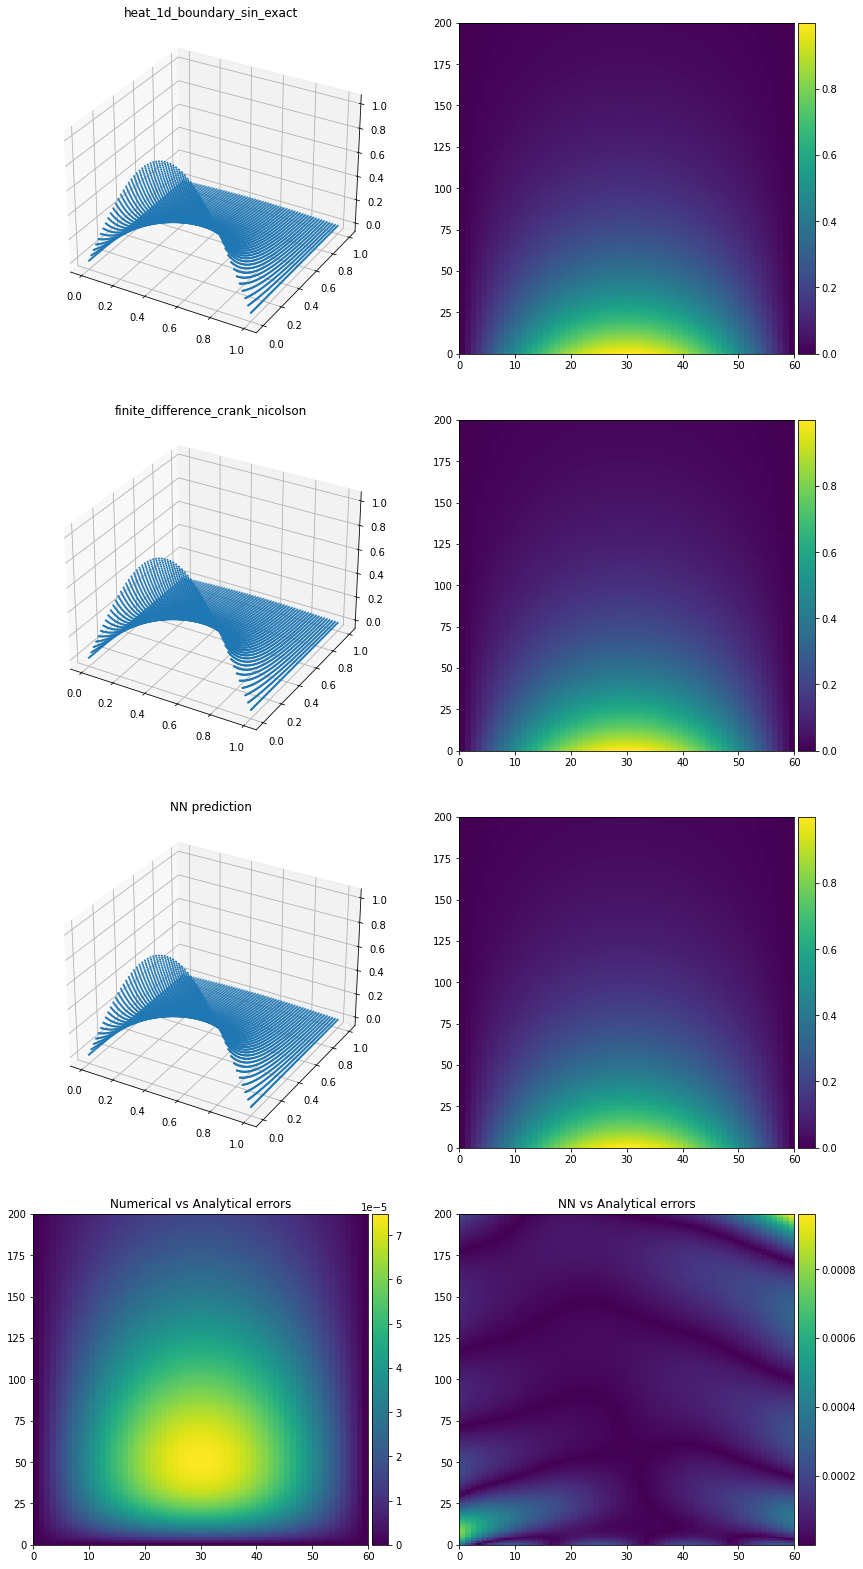

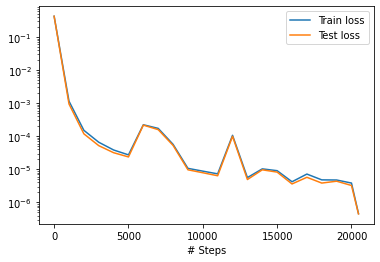

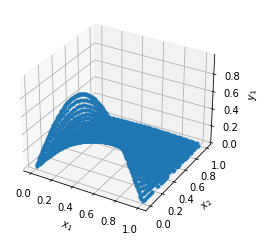

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  8.071344525647596e-05
Mean squared error:  1.5280832537538258e-08
Max error:  0.0009599477052688575
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [3]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(
    model,
    heat_params=const_params,
    pinn_params=pinn_params,
    timer_repeat_times=TIMER_REPEAT_TIMES,
    losshistory=losshistory,
    train_state = train_state)


# Test 2: Reduce hidden layers and size to break solution

In [4]:
pinn_params = PinnParam()
pinn_params.nn_hidden_layer_num = 1
pinn_params.nn_hidden_layer_size = 5

geomtime_data, model = create_model(const_params, pinn_params)

/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


Compiling model...
Building feed-forward neural network...
'build' took 0.017537 s

'compile' took 0.134791 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.32e-03, 3.75e-01, 1.66e+00]    [6.11e-03, 3.75e-01, 1.66e+00]    []  


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 16:54:09.176045: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


1000      [1.99e-02, 8.09e-02, 1.61e-01]    [1.80e-02, 8.09e-02, 1.61e-01]    []  
2000      [1.51e-02, 6.93e-02, 1.45e-01]    [1.32e-02, 6.93e-02, 1.45e-01]    []  
3000      [8.99e-03, 4.21e-02, 8.03e-02]    [7.92e-03, 4.21e-02, 8.03e-02]    []  
4000      [1.54e-02, 3.66e-02, 6.33e-02]    [1.33e-02, 3.66e-02, 6.33e-02]    []  
5000      [1.46e-02, 3.08e-02, 5.40e-02]    [1.27e-02, 3.08e-02, 5.40e-02]    []  
6000      [1.56e-02, 1.41e-02, 3.22e-02]    [1.29e-02, 1.41e-02, 3.22e-02]    []  
7000      [1.28e-02, 6.73e-03, 1.95e-02]    [9.92e-03, 6.73e-03, 1.95e-02]    []  
8000      [1.11e-02, 5.79e-03, 1.56e-02]    [8.53e-03, 5.79e-03, 1.56e-02]    []  
9000      [8.38e-03, 5.61e-03, 1.20e-02]    [6.29e-03, 5.61e-03, 1.20e-02]    []  
10000     [7.47e-03, 5.15e-03, 1.04e-02]    [5.73e-03, 5.15e-03, 1.04e-02]    []  
11000     [6.80e-03, 5.18e-03, 9.67e-03]    [5.43e-03, 5.18e-03, 9.67e-03]    []  
12000     [6.36e-03, 5.08e-03, 9.14e-03]    [5.02e-03, 5.08e-03, 9.14e-03]    []  
1300

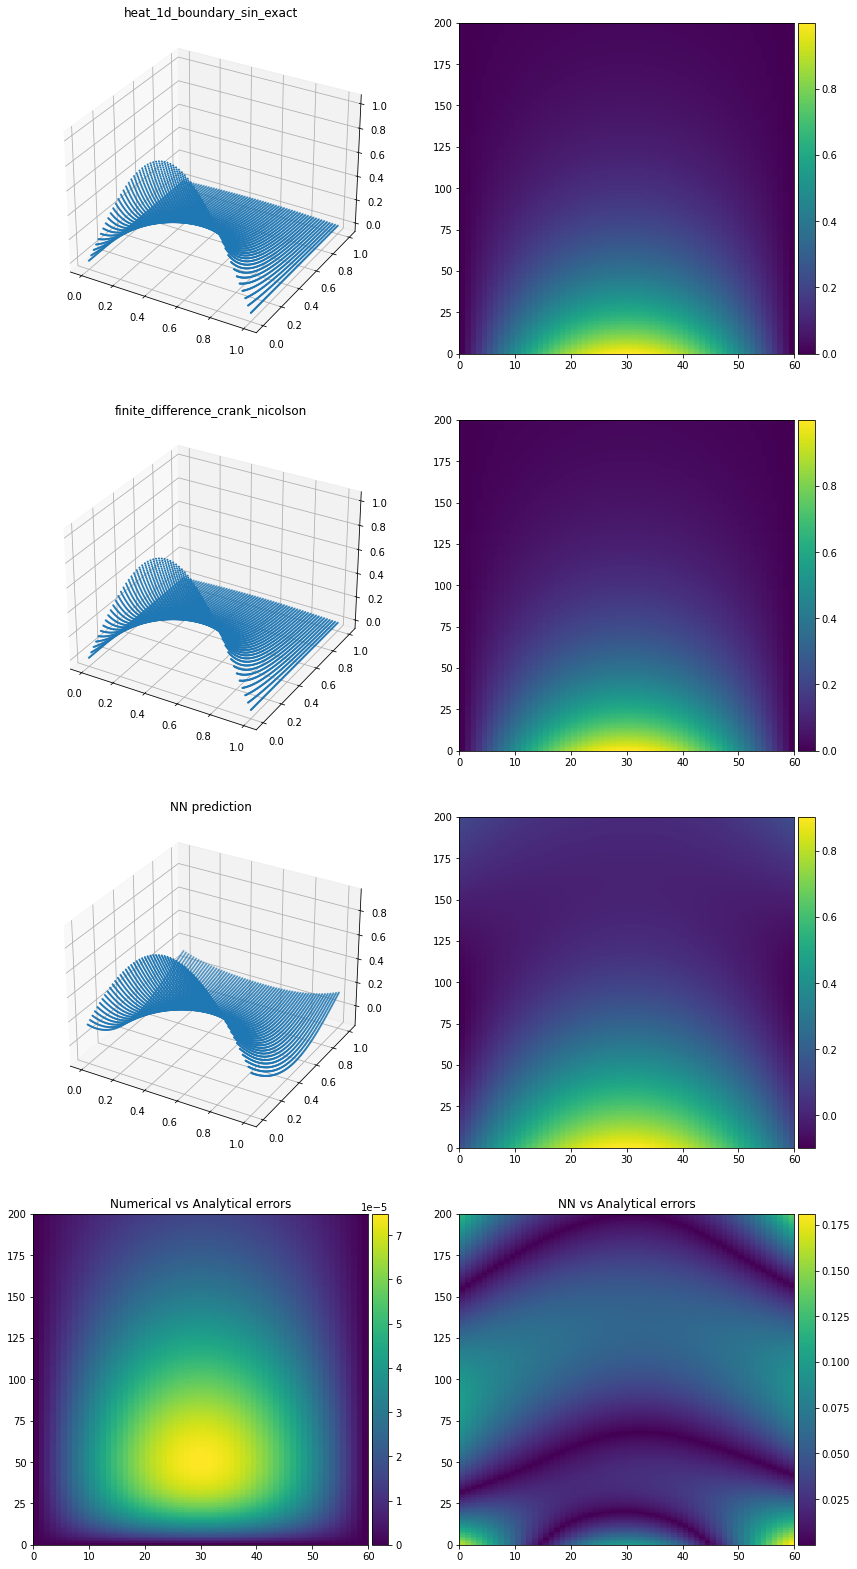

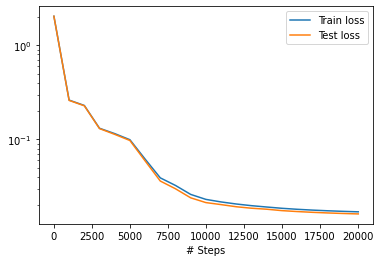

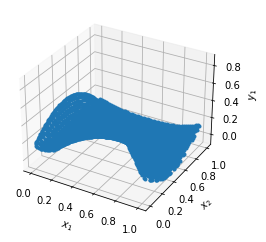

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.040257524237844344
Mean squared error:  0.0022862476739324233
Max error:  0.18100392818450917
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Param: 
d_num_domain: 2540
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 5
nn_hidden_layer_num: 1



In [5]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(
    model,
    heat_params=const_params,
    pinn_params=pinn_params,
    timer_repeat_times=TIMER_REPEAT_TIMES,
    losshistory=losshistory,
    train_state = train_state)


# Test 3: Reduce boundary points to break solution

train_bc_points shape (6, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+2542=2542. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+5=5. 
  warnings.warn("The balance properties of Sobol' points require "


train_points shape (2546, 2)
train_next_batch shape (2552, 2)


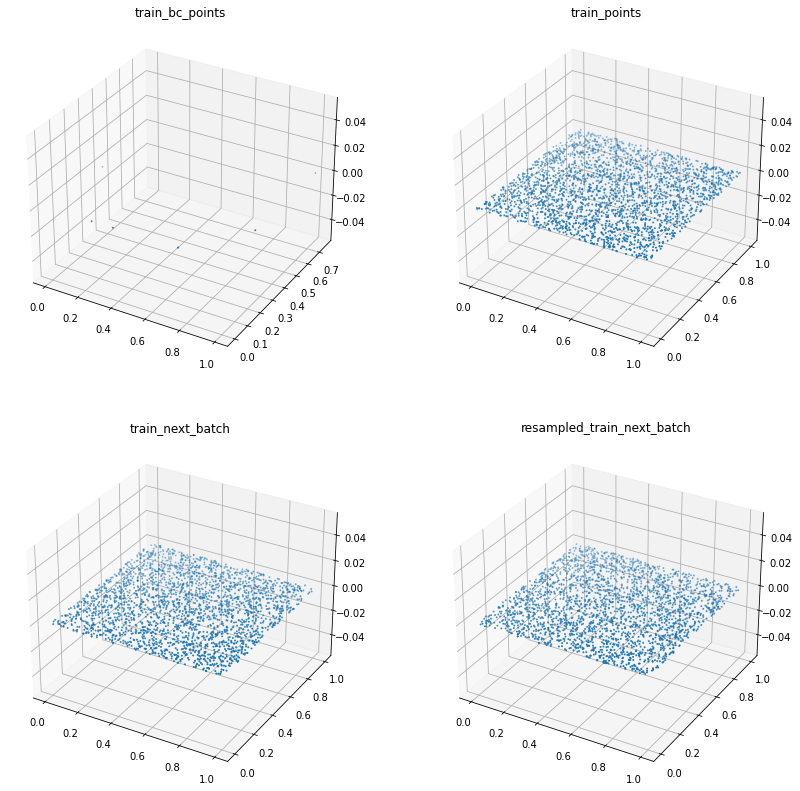

In [6]:
pinn_params = PinnParam()
pinn_params.d_num_boundary = 3
pinn_params.d_num_initial = 3

geomtime_data, model = create_model(const_params, pinn_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.029579 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 16:54:27.485611: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.211582 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [7.05e-02, 7.40e-02, 8.20e-01]    [7.06e-02, 7.40e-02, 8.20e-01]    []  
1000      [2.24e-03, 5.02e-03, 3.46e-03]    [1.90e-03, 5.02e-03, 3.46e-03]    []  
2000      [4.00e-04, 1.21e-05, 4.06e-04]    [3.12e-04, 1.21e-05, 4.06e-04]    []  
3000      [1.95e-04, 1.34e-07, 8.64e-05]    [1.53e-04, 1.34e-07, 8.64e-05]    []  
4000      [1.49e-04, 1.50e-07, 3.06e-05]    [1.20e-04, 1.50e-07, 3.06e-05]    []  
5000      [1.18e-04, 2.95e-07, 1.34e-05]    [9.78e-05, 2.95e-07, 1.34e-05]    []  
6000      [9.36e-05, 3.57e-07, 7.15e-06]    [7.70e-05, 3.57e-07, 7.15e-06]    []  
7000      [7.37e-05, 2.15e-07, 4.17e-06]    [6.06e-05, 2.15e-07, 4.17e-06]    []  
8000      [7.34e-05, 4.22e-05, 3.14e-05]    [5.80e-05, 4.22e-05, 3.14e-05]    []  
9000      [4.78e-05, 5.43e-08, 2.27e-06]    [3.82e-05, 5.43e-08, 2.27e-06]    []  
10000   

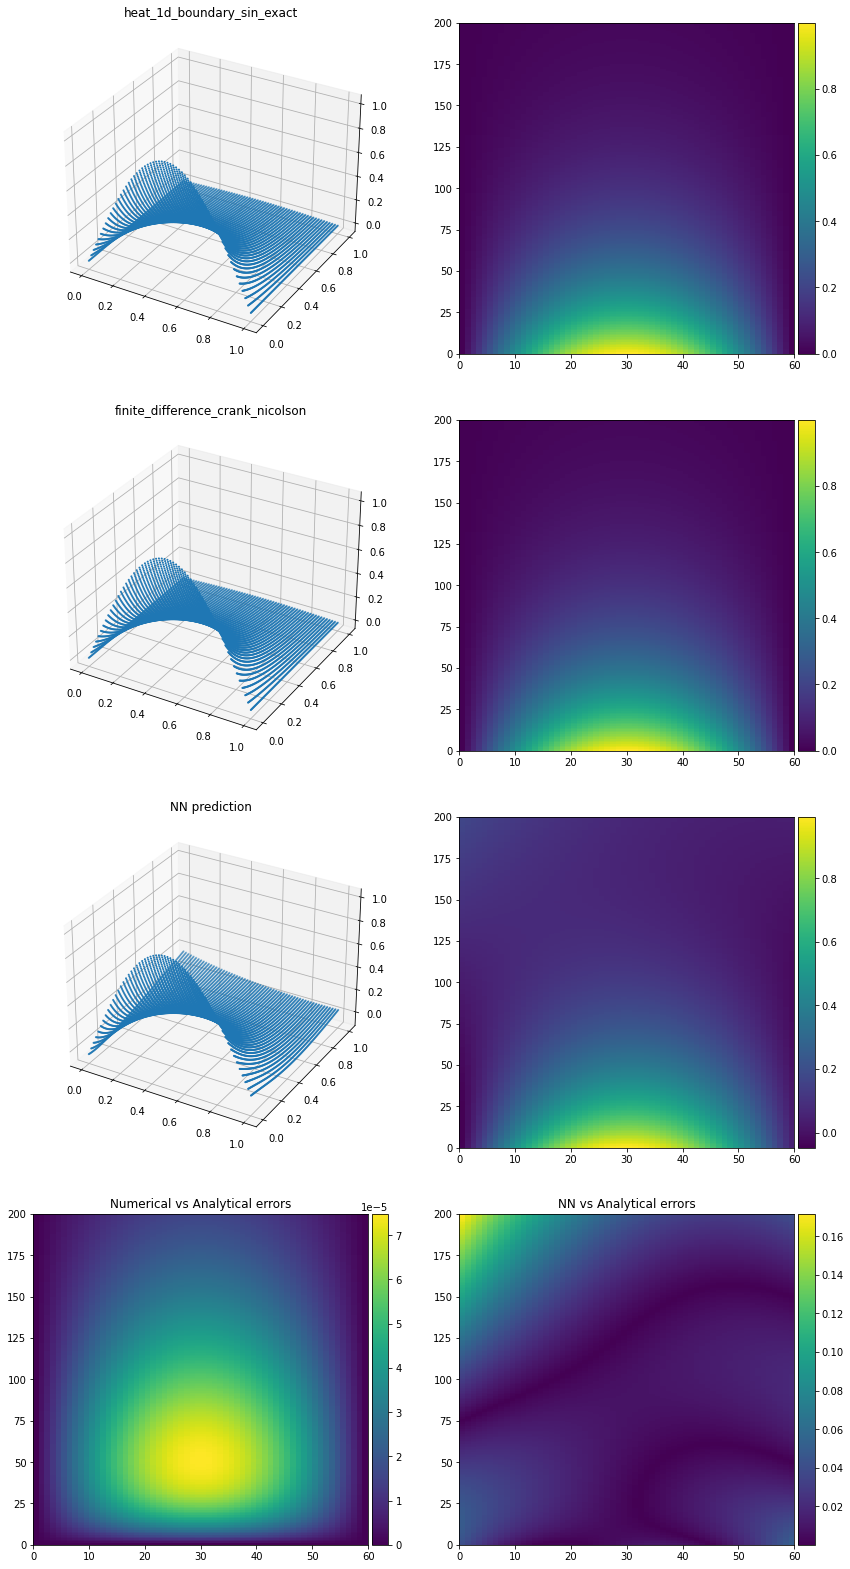

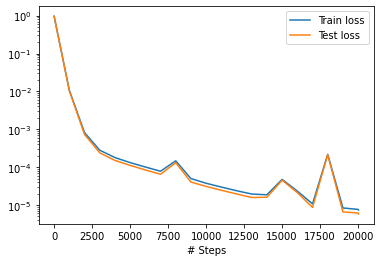

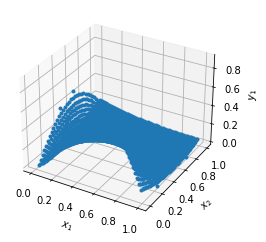

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.021454266960895998
Mean squared error:  0.0011171796399335819
Max error:  0.17158284783363342
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Param: 
d_num_domain: 2540
d_num_boundary: 3
d_num_initial: 3
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [7]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(
    model,
    heat_params=const_params,
    pinn_params=pinn_params,
    timer_repeat_times=TIMER_REPEAT_TIMES,
    losshistory=losshistory,
    train_state = train_state)

# Test 4: Reduce domain to break solution

train_bc_points shape (240, 2)
train_points shape (290, 2)
train_next_batch shape (530, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+82=82. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+162=162. 
  warnings.warn("The balance properties of Sobol' points require "


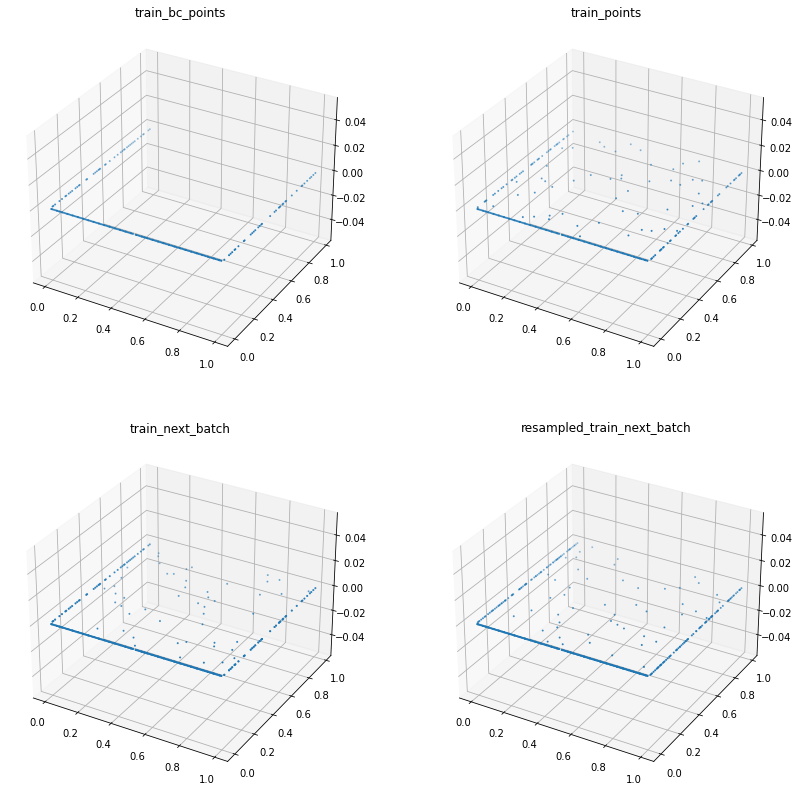

In [8]:
pinn_params = PinnParam()
pinn_params.d_num_domain = 50

geomtime_data, model = create_model(const_params, pinn_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.031509 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 16:55:27.533917: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.245070 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.96e-02, 3.13e-02, 6.77e-01]    [1.40e-02, 3.13e-02, 6.77e-01]    []  
1000      [1.58e-03, 1.73e-03, 8.62e-04]    [4.90e-03, 1.73e-03, 8.62e-04]    []  
2000      [3.95e-04, 2.34e-04, 6.42e-05]    [1.12e-03, 2.34e-04, 6.42e-05]    []  
3000      [1.19e-04, 8.48e-06, 4.84e-06]    [4.96e-04, 8.48e-06, 4.84e-06]    []  
4000      [7.76e-05, 4.08e-06, 2.89e-06]    [3.70e-04, 4.08e-06, 2.89e-06]    []  
5000      [5.78e-05, 3.53e-06, 2.03e-06]    [2.85e-04, 3.53e-06, 2.03e-06]    []  
6000      [8.19e-05, 7.31e-06, 9.43e-06]    [2.43e-04, 7.31e-06, 9.43e-06]    []  
7000      [3.62e-05, 2.56e-06, 1.18e-06]    [1.83e-04, 2.56e-06, 1.18e-06]    []  
8000      [2.95e-05, 2.03e-06, 9.05e-07]    [1.49e-04, 2.03e-06, 9.05e-07]    []  
9000      [2.77e-05, 1.61e-06, 7.04e-07]    [1.21e-04, 1.61e-06, 7.04e-07]    []  
10000   

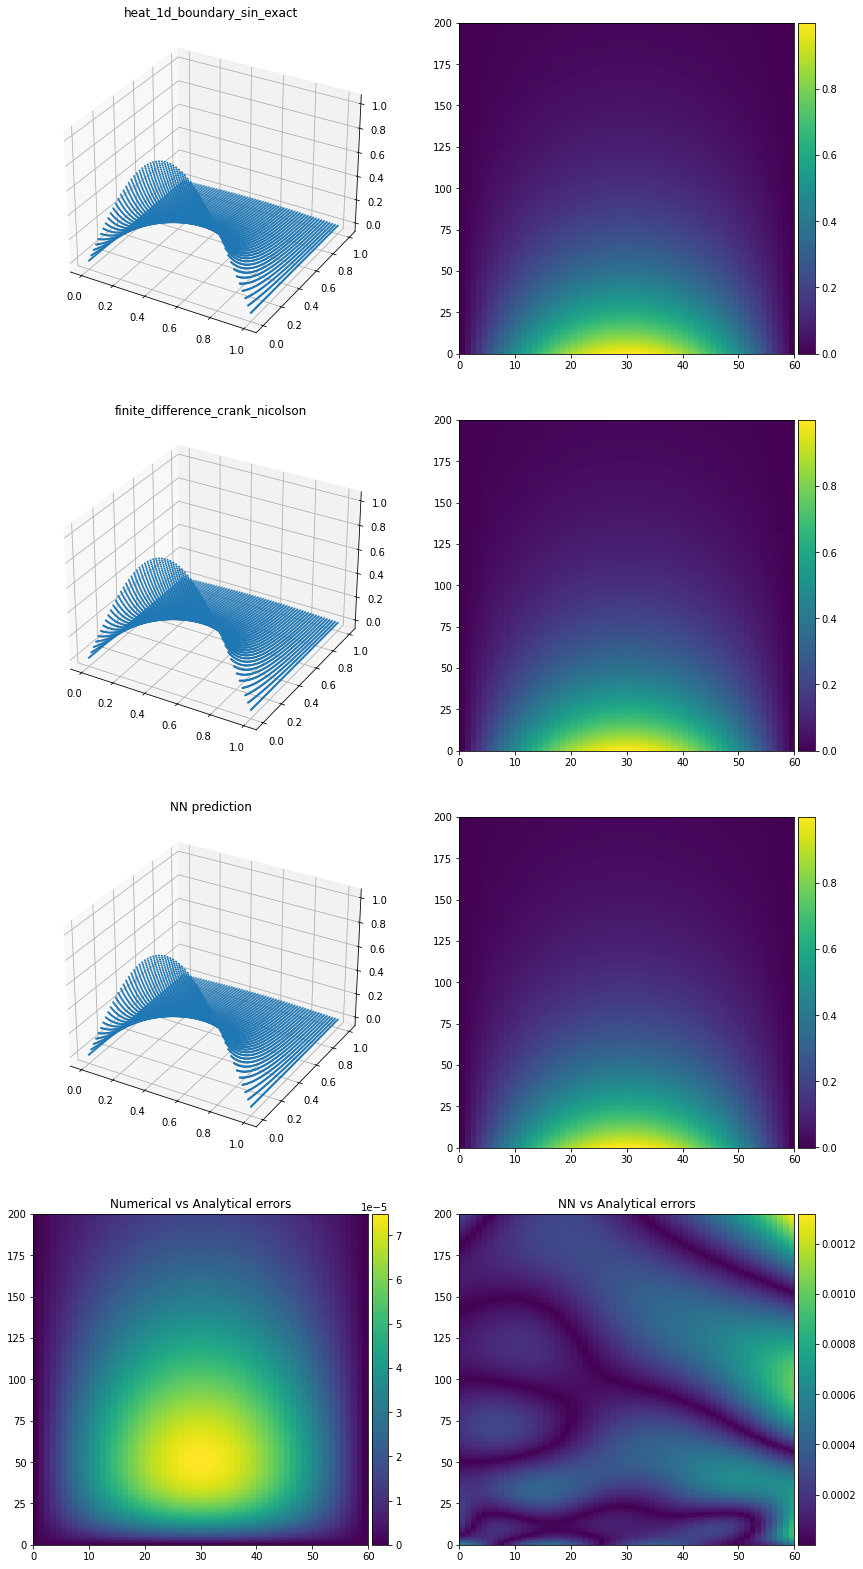

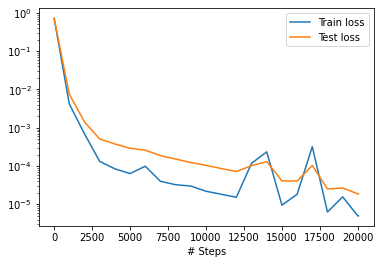

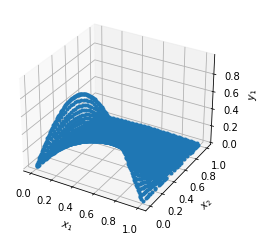

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.0002571992733763469
Mean squared error:  1.0746750816281493e-07
Max error:  0.0013182237744331336
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Param: 
d_num_domain: 50
d_num_boundary: 80
d_num_initial: 160
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [9]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(
    model,
    heat_params=const_params,
    pinn_params=pinn_params,
    timer_repeat_times=TIMER_REPEAT_TIMES,
    losshistory=losshistory,
    train_state = train_state)


# Test 5: Sparse train data (domain and bc) but still get good solution

train_bc_points shape (26, 2)
train_points shape (76, 2)
train_next_batch shape (102, 2)


/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+52=52. 
  warnings.warn("The balance properties of Sobol' points require "
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+15=15. 
  warnings.warn("The balance properties of Sobol' points require "


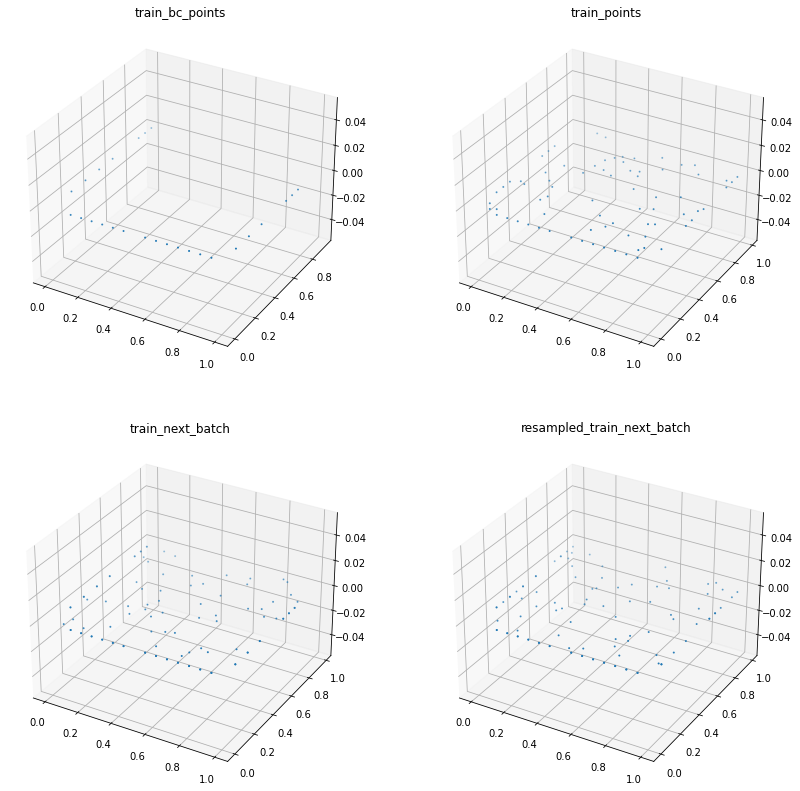

In [10]:
pinn_params = PinnParam()
pinn_params.d_num_domain = 50
pinn_params.d_num_boundary = 13
pinn_params.d_num_initial = 13

geomtime_data, model = create_model(const_params, pinn_params)
plot_train_data(geomtime_data)

Compiling model...
Building feed-forward neural network...
'build' took 0.033780 s



/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/home/radian/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2021-12-14 16:55:51.985199: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


'compile' took 0.247772 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [2.82e-01, 6.98e-02, 6.34e-01]    [2.87e-01, 6.98e-02, 6.34e-01]    []  
1000      [2.39e-03, 2.12e-03, 3.32e-03]    [1.62e-03, 2.12e-03, 3.32e-03]    []  
2000      [2.65e-04, 2.12e-05, 3.58e-05]    [3.75e-04, 2.12e-05, 3.58e-05]    []  
3000      [1.03e-04, 1.09e-06, 1.88e-05]    [1.98e-04, 1.09e-06, 1.88e-05]    []  
4000      [5.14e-05, 1.07e-07, 2.84e-06]    [1.15e-04, 1.07e-07, 2.84e-06]    []  
5000      [3.42e-05, 1.60e-07, 2.53e-06]    [7.62e-05, 1.60e-07, 2.53e-06]    []  
6000      [3.00e-05, 6.41e-06, 8.51e-06]    [5.78e-05, 6.41e-06, 8.51e-06]    []  
7000      [4.04e-05, 1.46e-05, 1.36e-05]    [5.26e-05, 1.46e-05, 1.36e-05]    []  
8000      [2.68e-05, 1.28e-05, 1.55e-05]    [4.10e-05, 1.28e-05, 1.55e-05]    []  
9000      [1.23e-05, 3.52e-07, 1.50e-06]    [3.17e-05, 3.52e-07, 1.50e-06]    []  
10000   

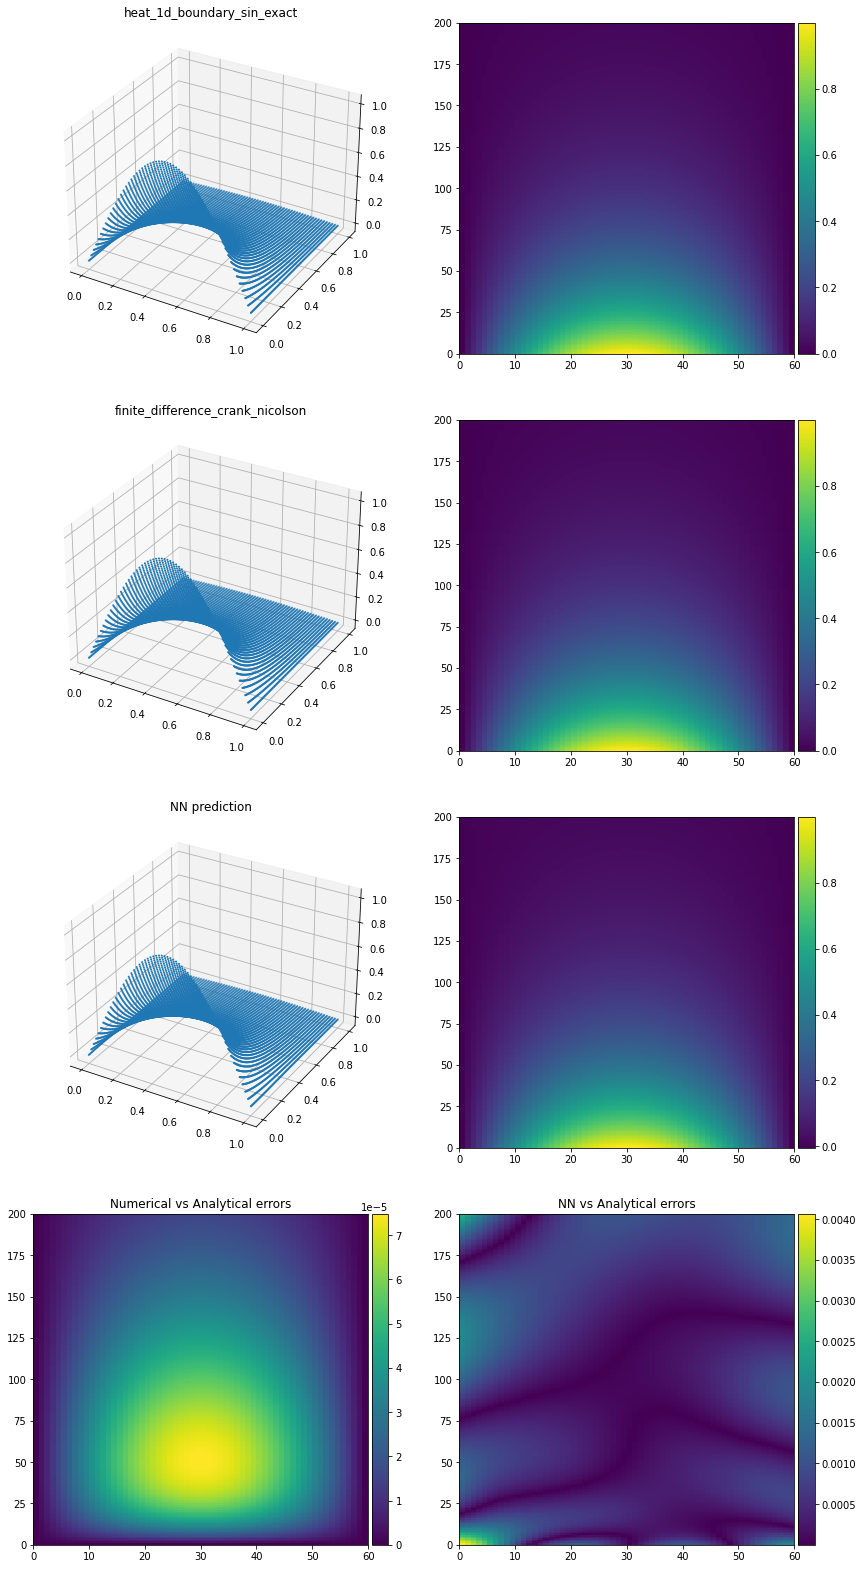

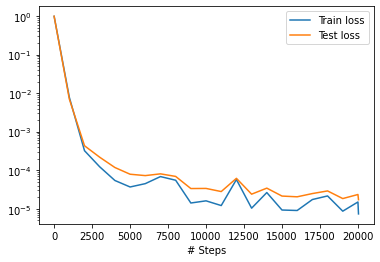

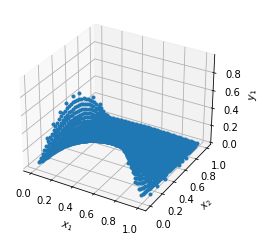

IGNORE ^^^ PDE test data SOLUTION PLOT!!! ^^^
--- Numerical vs Analytical Report ---
Mean absolute error:  2.9059873630420946e-05
Mean squared error:  1.26415187285393e-09
Max error:  7.483296180527121e-05
--- NN vs Analytical Report ---
Mean absolute error:  0.0005105798822941041
Mean squared error:  4.2824981994638014e-07
Max error:  0.004065144807100296
Heat Const Param: 
a: 0.4
L: 1
n: 1
t_end: 1
test_x_dim: 60
test_t_dim: 200
analytical_function_name: heat_1d_boundary_sin_exact
numerical_function_name: finite_difference_crank_nicolson

Pinn Param: 
d_num_domain: 50
d_num_boundary: 13
d_num_initial: 13
nn_hidden_layer_size: 20
nn_hidden_layer_num: 3



In [11]:
# Train model and output results
losshistory, train_state = train_model(model)
predict_and_output_report(
    model,
    heat_params=const_params,
    pinn_params=pinn_params,
    timer_repeat_times=TIMER_REPEAT_TIMES,
    losshistory=losshistory,
    train_state = train_state)
